# **Statistics Lab 52568 - Lab 4**


Idan Keipour 315355537

Menachem Sokolik 314696972

Maria Mordvova 345232821

In [ ]:
import numpy as np  # a module for working with numerical array 
import pandas as pd  # a module for working with data-frames
from matplotlib import pyplot as plt
import random
import statsmodels.api as sm

First, we need to mount our local drive to the colab network

In [ ]:
# Add a check if we run in google colab or locally in jupyter notebook
run_in_colab = False
if 'google.colab' in str(get_ipython()):
    run_in_colab = True
    print('Running on CoLab')
else:
    print('Running locally on Jupyter')

# Mount drive in google colab

from google.colab import drive
drive.mount('/content/drive')
 

Running on CoLab
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading elections 2021 elections data - ballot:
if run_in_colab:
    from google.colab import files
    uploaded = files.upload()

Saving eshkol_hevrati_calcali.xlsx to eshkol_hevrati_calcali (1).xlsx
Saving eshkol_hevrati_calcali.csv to eshkol_hevrati_calcali (1).csv
Saving votes per city 2021.csv to votes per city 2021 (1).csv
Saving votes per ballot 2021.csv to votes per ballot 2021 (1).csv


In [ ]:
# Loading elections 2021 elections data:
import io

data_type = "city" # "ballot"  # city
if run_in_colab:
    if data_type == "ballot":
      df_2021_raw = pd.read_csv(io.BytesIO(uploaded['votes per city 2021.csv']),  encoding = 'iso-8859-8', index_col='שם ישוב')
    else:
      df_2021_raw = pd.read_csv(io.BytesIO(uploaded['votes per city 2021.csv']),  encoding = 'iso-8859-8', index_col='שם ישוב')
else:  # read local file
    if data_type == "ballot":
        df_2021_raw = pd.read_csv(data_path + 'votes per ballot 2021.csv',  encoding = 'iso-8859-8', index_col='שם ישוב')
    else:
        df_2021_raw = pd.read_csv(data_path + 'votes per city 2021.csv',  encoding = 'iso-8859-8', index_col='שם ישוב')

if data_type == "ballot":
    # preprocessing of ballot
    df_2021 = df_2021_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
    df_2021 = df_2021[df_2021.columns[8:-1]] # removing "metadata" columns
else:
    # preprocessing of cities 
    df_2021 = df_2021_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
    df_2021 = df_2021[df_2021.columns[5:-1]] # removing "metadata" columns
# Dataset is now stored in a Pandas Dataframe

# convert columns with the parties' names:
parties_dict_2021 ={'אמת' : "עבודה", 'מרצ' : "מרצ",  'ג' : "יהדות התורה", 'עם'  : "רעם",  'ת'  : "תקוה חדשה", 'ודעם'  : "הרשימה המשותפת", 'ב'  : "ימינה", 'ט'  : "הציונות הדתית",
 'ל'  : "ישראל ביתנו", 'מחל'  : "הליכוד",  'פה'  : "יש עתיד", 'כן'  : "כחול לבן", 'שס'  : "שס"}

df_2021.rename(columns=parties_dict_2021, inplace=True)

### Extract only parties columns 

In [ ]:
# df_2021.reset_index(inplace=True)
df_2021.style.set_properties(**{'text-align': 'left'})
df_2021.head()

,עבודה,ימינה,יהדות התורה,הרשימה המשותפת,ז,זץ,הציונות הדתית,י,יז,ינ,יף,יק,יר,כ,כך,כחול לבן,ישראל ביתנו,הליכוד,מרצ,נ,ני,נר,רעם,יש עתיד,ףז,צי,צכ,צף,ץ,ק,קי,קך,קץ,ר,רנ,רף,רק,שס,תקוה חדשה
שם ישוב,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
אבירים,47,0,0,3,0,0,2,0,3,0,0,0,0,0,0,16,2,5,31,0,0,0,0,27,0,0,0,0,0,0,0,0,0,5,0,0,0,1,8
אדירים,1,7,4,0,0,0,9,0,1,0,0,0,0,0,0,3,0,84,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0,61,6
אושה,72,7,0,3,0,0,0,0,2,0,0,1,0,0,0,37,8,24,20,0,0,0,0,86,0,0,0,0,0,0,0,0,0,1,0,0,0,0,15
אחווה,14,4,0,0,0,0,4,0,0,0,0,0,0,0,0,36,3,27,10,0,0,0,0,37,0,0,0,0,0,0,0,0,0,0,0,0,0,2,8
איבים,0,4,0,0,0,1,10,0,0,0,0,0,0,0,0,5,0,17,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


We use only the parties which their voting **percentage** 
in a given city is above a % threshold, and we remove the results of 'Maatafot hitzoniot':

In [ ]:
# Compute votes share only for parties above a certain threshold 
def parties_votes_percents(df, thresh):
    par = df.sum().div(df.sum().sum()).sort_values(ascending=False)
    return par[par > thresh]

total_votes = parties_votes_percents(df_2021, 0.035)  # total votes for each party
names = total_votes.keys() # 13 parties

# Data with only the 13 relevant parties:
df_2021 = df_2021[names]
df_2021 = df_2021.drop('מעטפות חיצוניות')
df_2021_raw = df_2021_raw.drop('מעטפות חיצוניות')

***Question 1: Calculation the new fix parameter using linear regression OLS***.



In [ ]:
def linear_regression(df, v):
    p = df.sum().div(df.sum().sum())
    bzb = df.sum(1) /v
    model = sm.OLS(bzb, df).fit()
    q_hat = p*model.params
    q_hat = q_hat / (q_hat.sum())
    return p, q_hat, model.params

***Question 2: Simulation (from Lab2 Question2 Answers) + fixing new OLS parameter and comparing them in batplots***


functions from the solution in order to proceed the simulations with the new fixed parameter OLS

In [ ]:
def sim_data(N,V):
  new_df = pd.DataFrame(np.random.binomial(N,V))
  new_df.index = df_2021.index
  v = new_df.sum(axis=1)/ N.sum(axis=1)
  return new_df, v

Computing $\tilde{N}$ and $V_i$ for the 3 simulations:

In [ ]:
# Nij~ :
N_tilde = np.array(df_2021.mul(df_2021_raw['בזב'].sum()).div(df_2021_raw['כשרים'].sum()),dtype='int32')

# 3 types of Vi 
v = df_2021_raw['כשרים'].div(df_2021_raw['בזב'])
u = [0.6,0.65,0.75,0.5,0.4,0.35,0.8,0.55,0.45,0.25,0.3,0.7,0.2]  # arbitrary ordering
u_random = random.sample(u, len(u))

dim = df_2021.shape
# converting them to the desired shape:
V_v = np.tile(np.array([v]).transpose(), (1, len(names)))
V_u = np.tile(np.array(u), (dim[0],1))
V_u_random = np.tile(np.array(u_random), (dim[0],1))


A function that calculates the p and the $\hat{q}$ (after fixing data to 100% votes with $V_i= \frac{kosher_i}{bzb_i}$)

In [ ]:
def fixing_data(df, fix_param):
  p = parties_votes_percents(df, 0) 
  q_hat = parties_votes_percents(df.div(fix_param, axis = "rows"), 0)
  return q_hat

## 50-simulations function:

In [ ]:
def simulations(iters, N, V):
  p_mat = np.zeros([iters, len(names)])
  q_hat_mat = np.zeros([iters, len(names)]) 
  q_hat = np.zeros([iters, len(names)])
  
  # in every simulation we calculate p and q_hat (after fixing the data)
  for i in range(0,iters):
    new_df, v = sim_data(N,V)
    q_hat[i,] = fixing_data(new_df, v)
    p_mat[i,], q_hat_mat[i,] = linear_regression(new_df, v)[0:2]

  return p_mat, q_hat, q_hat_mat

## Run 50 simulations and calculate mean, var, bias and mse

In [ ]:
iters = 50 # number of simulations
q_real = N_tilde.sum(axis=0)/(N_tilde.sum())

sim_v = simulations(iters, N_tilde, V_v)
mean_p_v = sim_v[0].mean(axis=0)
mean_q_v = sim_v[1].mean(axis=0)
mean_q_v_alpha = sim_v[2].mean(axis=0)



sim_u = simulations(iters, N_tilde, V_u)
mean_p_u = sim_u[0].mean(axis=0) 
mean_q_u = sim_u[1].mean(axis=0) 
mean_q_u_alpha = sim_u[2].mean(axis=0)


sim_u_random = simulations(iters, N_tilde, V_u_random)
mean_p_u_random = sim_u_random[0].mean(axis=0)
mean_q_u_random = sim_u_random[1].mean(axis=0)
mean_q_u_random_alpha = sim_u_random[2].mean(axis=0)

In [ ]:
pd.DataFrame( [q_real, mean_q_v, mean_q_u, mean_q_u_random], columns=names, index=['"real" 100%', 'fix with v', 'fix with u', 'fix with u random']).head(4)  # mean


,הליכוד,יש עתיד,שס,כחול לבן,ימינה,עבודה,יהדות התורה,ישראל ביתנו,הציונות הדתית,הרשימה המשותפת,תקוה חדשה,מרצ,רעם
"""real"" 100%",0.245353,0.141524,0.074292,0.067524,0.059536,0.059624,0.059694,0.056165,0.050465,0.051237,0.047548,0.046211,0.040829
fix with v,0.245354,0.141514,0.074282,0.067543,0.059704,0.059618,0.059530,0.056180,0.051242,0.050453,0.047545,0.046203,0.040833
fix with u,0.264737,0.167038,0.093632,0.072655,0.062066,0.061144,0.055662,0.043451,0.043252,0.041050,0.038213,0.031146,0.025954
fix with u random,0.194486,0.138826,0.095073,0.089580,0.085867,0.085319,0.056948,0.051508,0.047251,0.047121,0.044812,0.032010,0.031199


## Bar-plots showing the results

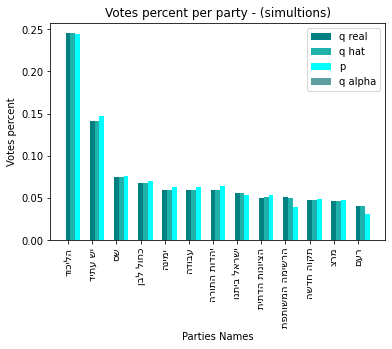

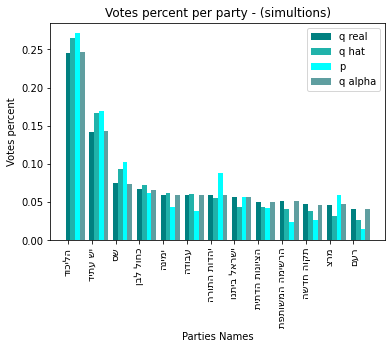

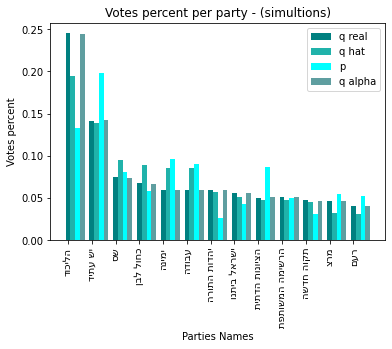

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4df5716050>)

In [ ]:

# Bar plot for a party, only showing values above a certain threshold after fixing:
def party_bar_fix(q_real, q_hat, p, q_alpha):
    width = 0.2  # set column width 
    n = len(total_votes)

    rev_names = [name[::-1] for name in list(names)]
    fig, ax = plt.subplots()  # plt.subplots()

    q_real_bar = ax.bar(np.arange(n), list(q_real), width, color='teal')
    q_hat_bar = ax.bar(np.arange(n)+width, q_hat, width, color='lightseagreen')
    p_bar = ax.bar(np.arange(n)+2*width, p, width, color='aqua')
    q_alpha_bar = ax.bar(np.arange(n)+3*width, q_alpha, width, color='cadetblue')

    ax.set_ylabel('Votes percent')
    ax.set_xlabel('Parties Names')
    ax.set_title('Votes percent per party - (simultions)')
    ax.set_xticks(np.arange(n))
    ax.set_xticklabels(rev_names, rotation=90)
    ax.legend((q_real_bar, q_hat_bar, p_bar, q_alpha_bar), ('q real', 'q hat', 'p', 'q alpha'))
    plt.show()

    return fig, ax

party_bar_fix(q_real, mean_q_v, mean_p_v, mean_q_v_alpha)
party_bar_fix(q_real, mean_q_u, mean_p_u, mean_q_u_alpha)
party_bar_fix(q_real, mean_q_u_random, mean_p_u_random, mean_q_u_random_alpha)

After analyzing the plots we can see that new parameter q-alpha close enough to the real_q for the 2nd and 3rd methods, but in 1st method it is far away from reality.

***Question 3: Analyzing socio-economic data***

In [ ]:
#Joining the dataframes
df_2021_q3 = df_2021
df_2021_q3['סמל ישוב'] = df_2021_raw['סמל ישוב']
dfinal = df_2021_q3.join(df_eshkol_hevrati_raw.set_index('set_code'), on='סמל ישוב') #joining the dataframes by the set code column
dfinal = dfinal.dropna() 
dfinal.head()

,הליכוד,יש עתיד,שס,כחול לבן,ימינה,עבודה,יהדות התורה,ישראל ביתנו,הציונות הדתית,הרשימה המשותפת,תקוה חדשה,מרצ,רעם,סמל ישוב,population,index_value,eco_level
שם ישוב,,,,,,,,,,,,,,,,,
אבירים,5,27,1,16,0,47,0,2,2,3,8,31,0,1220,194.0,0.734,7.0
אדירים,84,2,61,3,7,1,4,0,9,0,6,0,0,113,267.0,0.011,5.0
אושה,24,86,0,37,7,72,0,8,0,3,15,20,0,278,462.0,0.873,7.0
אחווה,27,37,2,36,4,14,0,3,4,0,8,10,0,1157,159.0,1.085,8.0
איבים,17,0,1,5,4,0,0,0,10,0,0,0,0,338,277.0,-2.401,1.0


In [ ]:
print("amount of obtained cities:")
len(dfinal.index)

amount of obtained cities:


1171

In [ ]:
print("amount of lost cities:")
len(df_2021_q3.index) - len(dfinal.index) 

amount of lost cities:


43

In [ ]:
national_vote = dfinal[names].sum().div(dfinal[names].sum().sum())
socio_vote = df_2021_q3[names].sum().div(df_2021_q3[names].sum().sum())

In [ ]:
# Bar plot for a party, only showing values above a certain threshold
def party_bar(national, socio):
    width = 0.3  # set column width 
    n = len(total_votes)  # number of parties

    rev_names = [name[::-1] for name in list(names)]
    fig, ax = plt.subplots()  # plt.subplots()

    national_vote = ax.bar(np.arange(n), list(national), width, color='lightcoral')
    socio_vote = ax.bar(np.arange(n)+ width , socio, width, color='maroon')

    ax.set_ylabel('Votes percent')
    ax.set_xlabel('Parties Names')
    ax.set_title('Comparing national Votes percent per party 2021 to clean data by Socio Votes')
    ax.set_xticks(np.arange(n))
    ax.set_xticklabels(rev_names, rotation = 90)
    ax.legend((national_vote, socio_vote), ("national vote", "socio vote"))
    plt.show()

    return fig, ax
  

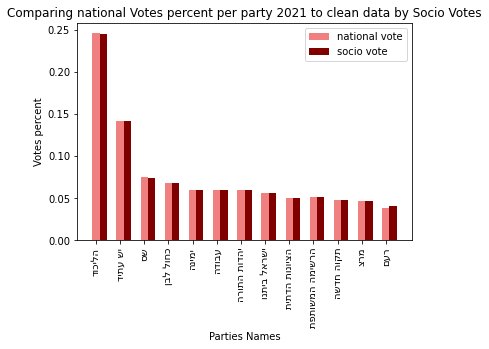

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4df5939ad0>)

In [ ]:
party_bar(national_vote, socio_vote)

From the barplot we can observe that there is no significant differences between "national vote" and "socio vote" results in cities, which occured in both dataframes. This could have happened because biggest part of the cities (1170 out of 1214) included in both datasets, on the other hand, it is logical to assume that cities that were not included in merging are the small cities, so they didn't change the results in a dramatic way.

***Question4. Defining patterns of voting depending on socio-economic status***.

In [ ]:
if   run_in_colab:
      df_eshkol_hevrati_raw = pd.read_excel(io.BytesIO(uploaded['eshkol_hevrati_calcali.xlsx']), index_col='name')
else:
  df_eshkol_hevrati_raw = pd.read_excel(data_path + 'eshkol_hevrati_calcali.xlsx',  index_col='name')  # need to read locally

In [ ]:
#4a.
dataF =  pd.DataFrame()
for i in range(1, 11):   
    # np.where we find the eco level    
    cities = np.where(dfinal['eco_level'].values.astype('float') == i)[0]
    dataF[i] = dfinal.iloc[cities][names].sum().div(dfinal.iloc[cities][names].sum().sum())
dataF = dataF.T
dataF

,הליכוד,יש עתיד,שס,כחול לבן,ימינה,עבודה,יהדות התורה,ישראל ביתנו,הציונות הדתית,הרשימה המשותפת,תקוה חדשה,מרצ,רעם
1,0.032556,0.004607,0.112501,0.001445,0.002173,0.002162,0.361278,0.000348,0.033230,0.092789,0.003955,0.008356,0.344598
2,0.132224,0.031683,0.156337,0.018071,0.039718,0.020677,0.247023,0.014716,0.071365,0.126095,0.020565,0.023287,0.098240
3,0.160870,0.031122,0.078107,0.017518,0.035278,0.018494,0.025292,0.045751,0.083894,0.272468,0.018706,0.032753,0.179746
4,0.325441,0.072709,0.100326,0.035809,0.046418,0.026998,0.041010,0.085306,0.062950,0.085410,0.038555,0.024793,0.054276
5,0.369005,0.095115,0.095030,0.040974,0.065048,0.026258,0.037225,0.117095,0.062039,0.022523,0.050632,0.015808,0.003248
6,0.371955,0.121793,0.079594,0.057049,0.086499,0.040014,0.015433,0.074675,0.064520,0.005594,0.058403,0.023559,0.000912
7,0.290612,0.185687,0.053748,0.085301,0.071388,0.064997,0.018748,0.067389,0.042984,0.013410,0.064015,0.040975,0.000747
8,0.194882,0.243561,0.028761,0.118293,0.063456,0.120785,0.006558,0.035633,0.026994,0.006788,0.056851,0.095945,0.001494
9,0.141208,0.290323,0.009762,0.149317,0.055276,0.134311,0.004785,0.030352,0.016062,0.003021,0.054918,0.110176,0.000487
10,0.171687,0.310743,0.005773,0.167420,0.038655,0.089357,0.003012,0.049448,0.012048,0.003263,0.038906,0.108434,0.001255


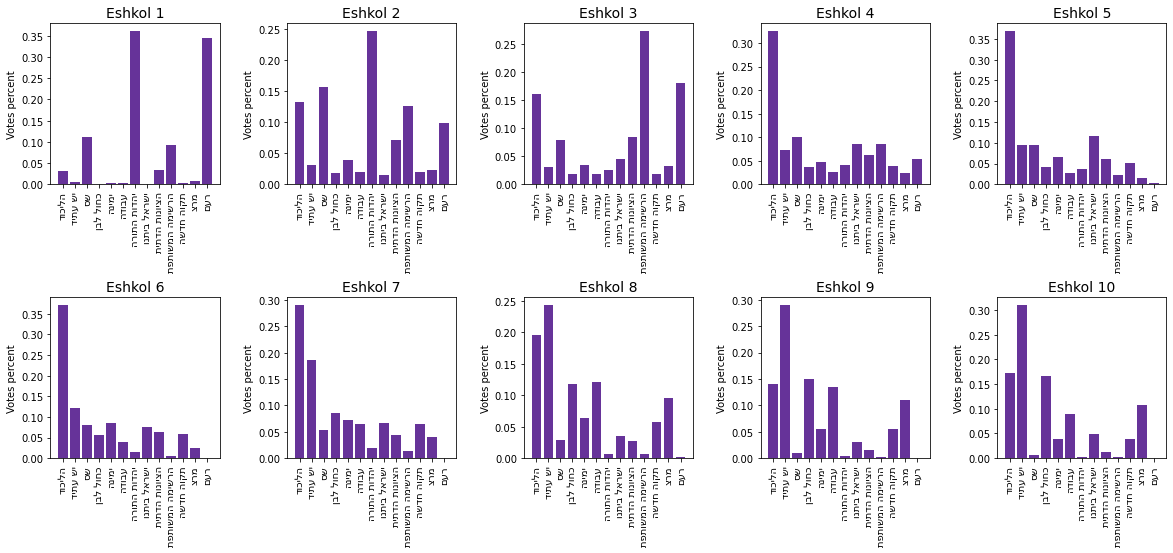

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(20,8))
plt.subplots_adjust(hspace=0.7, wspace=0.4)

rev_names = [name[::-1] for name in list(names)]

for i in range(10):
  plt.subplot(2,5,i+1)
  plt.bar(rev_names, dataF.loc[i+1], color='rebeccapurple')
  plt.title("Eshkol " + str(i+1), fontsize=14)
  plt.ylabel('Votes percent')
  plt.xticks(rotation=90)


By comparing the plots between each other, we can clearly see that in the 1st economic rank most of electorate votes are split between יהדות התורה״" and "רעם", however, with the increasing level of economic rank the votes become more distributed between all of the parties decreasing the postions of "יהדות התורה" and "רעם" . Particularly, we can indicate that starting from 4th economic rank most of the votes are given to "הליכוד". Therefore, in the highest economic ranks 8-10 most of the votes are given to "יש עתיד", while "הליכוד" decreases its position at comes at second place as best with another parties.

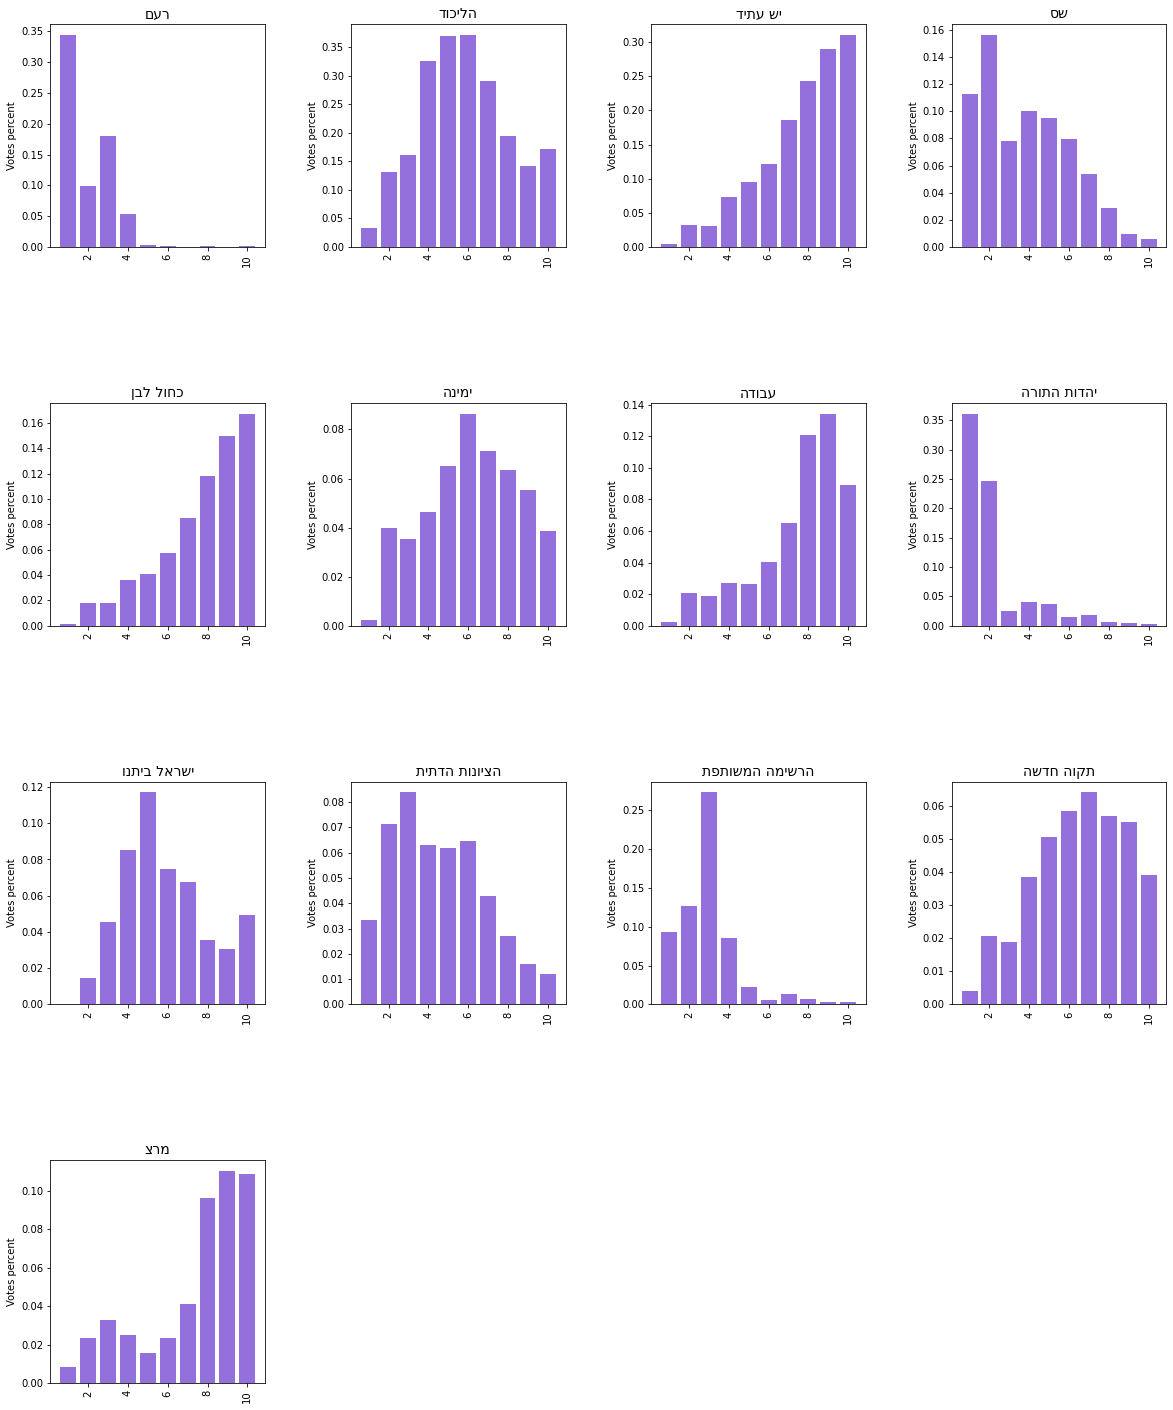

In [ ]:
dataF_2 = dataF.T

figure(figsize=(20,25))
plt.subplots_adjust(hspace=0.7, wspace=0.4)

rev_names_2=list(range(1,11))

for i in range(13):
  plt.subplot(4,4,i+1)
  plt.bar(rev_names_2, dataF_2.iloc[i-1], color='mediumpurple')
  plt.title(dataF_2.index[i-1][::-1] , fontsize=14)
  plt.ylabel('Votes percent')
  plt.xticks(rotation=90)

Conclusion: By sorting data by parties, we can observe the distribution of votes for each party among different social-economic rated cities. As we can see, the parties "רעם" ,"שס" and "יהדות התורה" are tent to receive their votes from low economic rated (1-2) cities. On the opposite, the biggest part of votes that come to "כחול לבן", "יש עתיד", "מרצ" come frow high economic rated (9-10) cities. The parties, whose votes come from middle socio-economic rated cities (5-7) are "ימינה", "הליכוד", "הציונות הדתיות". Moreover, it can be clearly seen as the economic rate rises the percent of votes for "כחול לבן" and "יש עתיד" parties also gradually rises.


Sorting data by parties in accordance with economic rate is really helpful, because it helps to understand which party will be chosen by people from different socio-economic backround. In a real world it is really useful, since according with that parties can expand their program and commercials on their target audience and, thus, attract new voters to vote for them. They also can broad their program in a such way to atract voters not from their prime "target" audience.
